# 0.0 IMPORTS

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display  import HTML
from IPython.display       import Image

from sklearn import model_selection as ms

## 0.1 Helper Functions

In [2]:
def show_percentage(ax, df):
    for p in ax.patches:
        height = p.get_height()
        # Adicionar rótulo de porcentagem somente se a altura da barra for maior que 0
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., 
                    height + 0.05, 
                    '{:.2f}%'.format(height * 100 / len(df)), 
                    ha="center")


def jupyter_settings():
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 8]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None

    sns.set()

In [3]:
jupyter_settings()

## 0.2 Loading Dataset

In [4]:
data_raw = pd.read_csv('./datasets/churn.csv')

In [74]:
X = data_raw.drop('Exited', axis=1)
y = data_raw['Exited']

x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

## 1.0 DATA DESCRIPTION

In [5]:
data_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1.1. Rename Columns

There's no need to change anything about the columns, they're all correct.

In [6]:
data_raw.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

### 1.2. Data Dimensions

In [7]:
print(f'Number of rows: {data_raw.shape[0]}')
print(f'Number of cols: {data_raw.shape[1]}')

Number of rows: 10000
Number of cols: 14


### 1.3. Data Types

In [8]:
data_raw.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### 1.4. Check NA

In [9]:
data_raw.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data_raw.duplicated().sum()

0

### 1.5. Fill NA

We have no empty data, no need to fill anything

### 1.6. Change Types

In [11]:
data_raw['HasCrCard'] = data_raw['HasCrCard'].astype('int64')

### 1.7. Columns Description

### 1.8. Data Statistical

In [12]:
num_attributes = data_raw.select_dtypes(include=['int64', 'float64'])
cat_attributes = data_raw.select_dtypes(include=['object'])

#### 1.8.1 Numerical Attributes

In [13]:
min_ =  pd.DataFrame(num_attributes.apply(np.min)).T
max_ =  pd.DataFrame(num_attributes.apply(np.max)).T

mean_ =  pd.DataFrame(num_attributes.apply(np.mean)).T
median_ =  pd.DataFrame(num_attributes.apply(np.median)).T

std_ =  pd.DataFrame(num_attributes.apply(np.std)).T
range_ =  pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
skew_ =  pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtosis_ =  pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


data_describe =pd.concat([min_, max_, mean_, median_, std_, range_, skew_, kurtosis_]).T.reset_index()
data_describe.columns = ['attributes', 'min', 'max', 'mean', 'median', 'std', 'range', 'skew', 'kurtosis']

data_describe.round(2)

,attributes,min,max,mean,median,std,range,skew,kurtosis
0,RowNumber,1.00,10000.00,5000.50,5000.50,2886.75,9999.00,0.00,-1.20
1,CustomerId,15565701.00,15815690.00,15690940.57,15690738.00,71932.59,249989.00,0.00,-1.20
2,CreditScore,350.00,850.00,650.53,652.00,96.65,500.00,-0.07,-0.43
3,Age,18.00,92.00,38.92,37.00,10.49,74.00,1.01,1.40
4,Tenure,0.00,10.00,5.01,5.00,2.89,10.00,0.01,-1.17
5,Balance,0.00,250898.09,76485.89,97198.54,62394.29,250898.09,-0.14,-1.49
6,NumOfProducts,1.00,4.00,1.53,1.00,0.58,3.00,0.75,0.58
7,HasCrCard,0.00,1.00,0.71,1.00,0.46,1.00,-0.90,-1.19
8,IsActiveMember,0.00,1.00,0.52,1.00,0.50,1.00,-0.06,-2.00
9,EstimatedSalary,11.58,199992.48,100090.24,100193.92,57507.62,199980.90,0.00,-1.18


#### 1.8.2. Categorical Attributes

In [14]:
# number of unique categories in each object columns
cat_attributes.apply(lambda x: x.unique().shape[0])

Surname      2932
Geography       3
Gender          2
dtype: int64

In [15]:
for i in cat_attributes.columns:
    print(f'{i}: {cat_attributes[i].unique()}')

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


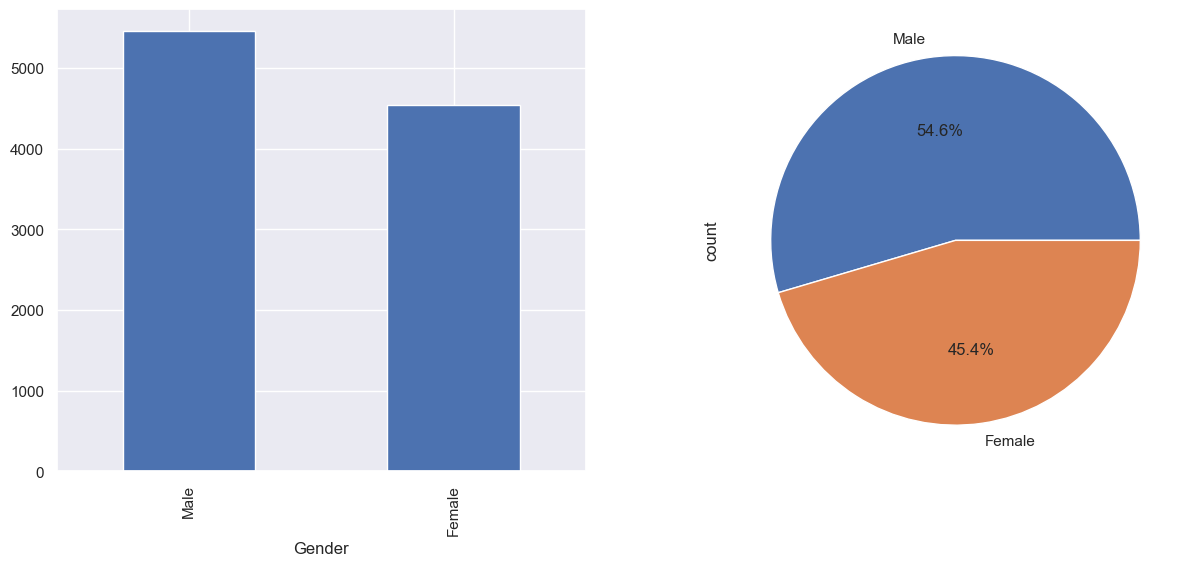

In [16]:
# Gender
# I have 9% more male customers than female

plt.subplot(1, 2, 1)
cat_attributes['Gender'].value_counts().plot(kind='bar', figsize=(15, 6))
plt.subplot(1, 2, 2)
cat_attributes['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 6));


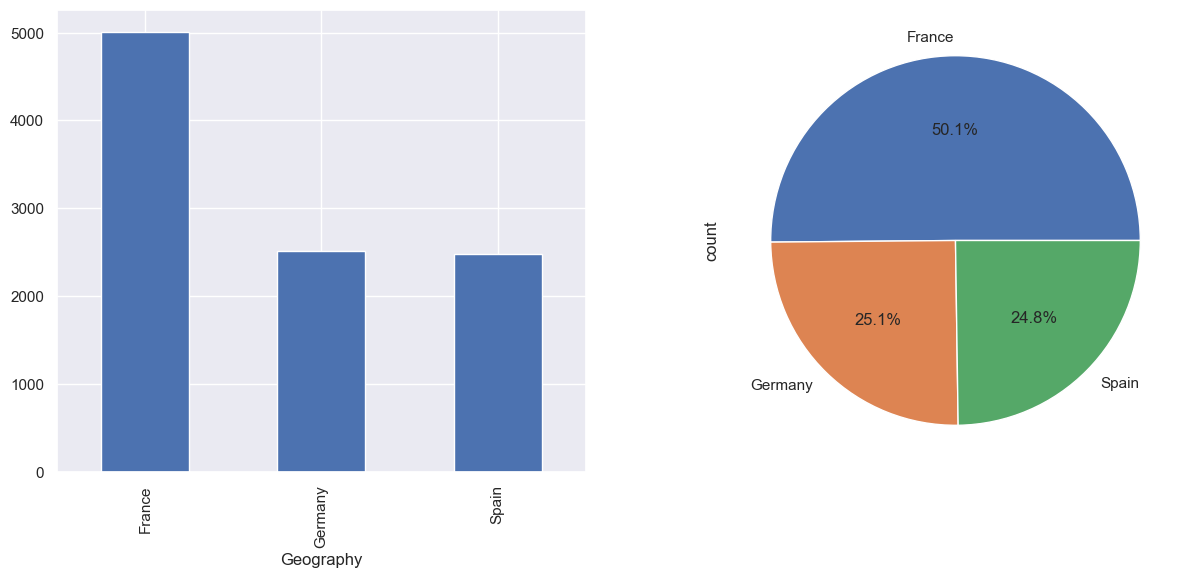

In [17]:

# Geography
# I have 50% of customers from France
plt.subplot(1, 2, 1)
cat_attributes['Geography'].value_counts().plot(kind='bar', figsize=(15, 6))
plt.subplot(1, 2, 2)
cat_attributes['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 6));

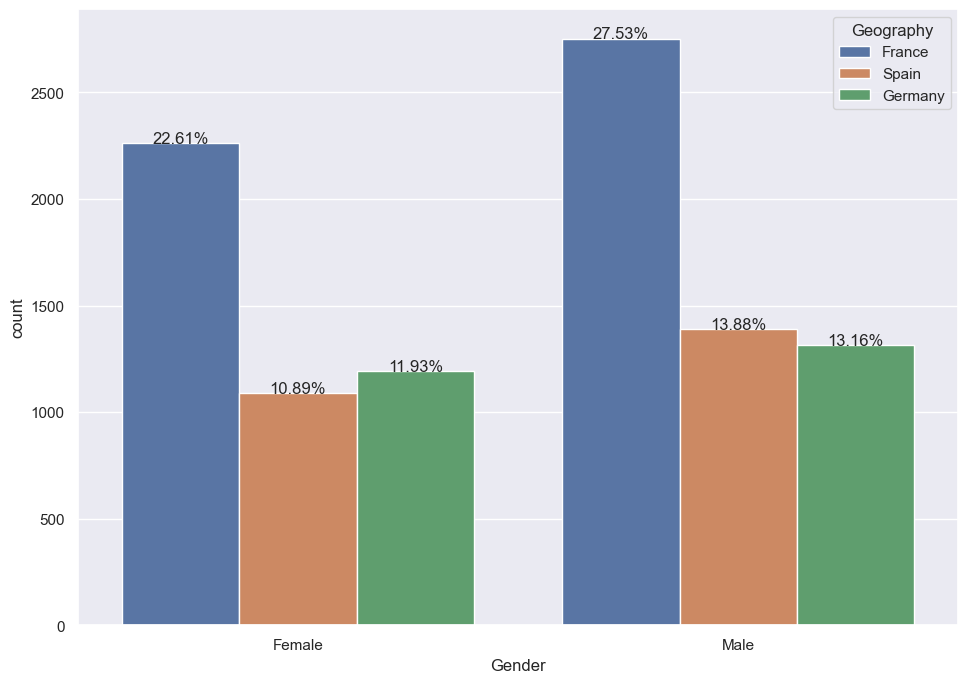

In [18]:
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Geography', data=cat_attributes)
show_percentage(df=cat_attributes, ax=plt.gca())


## 2.0. FEATURE ENGINEERING

In [19]:
df2 = data_raw.copy()

## 3.0. DATA FILTERING

In [22]:
df3 = df2.copy()

## 4.0. EDA

In [23]:
df4 = df3.copy()

### 4.1 Análise Univáriada

Como podemos constatar através do gráfico, temos uma variável resposta desbalanceda.

#### 4.1.1 Target

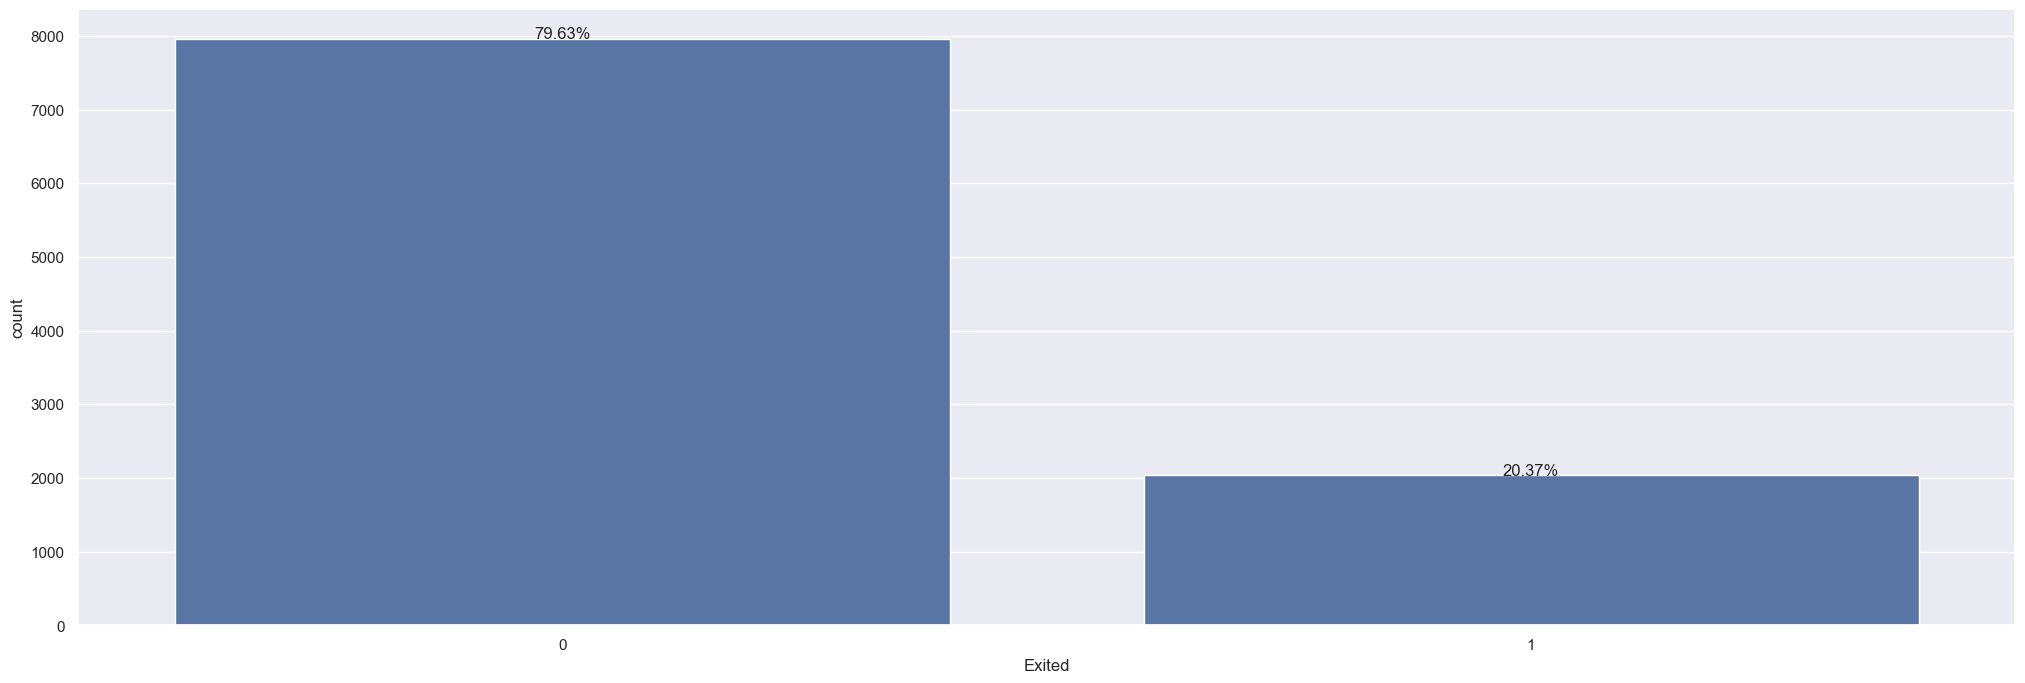

In [24]:
ax = sns.countplot(data=df4, x='Exited')
show_percentage(ax, df4)


#### 4.1.2 Gender

Womans exited more than mans


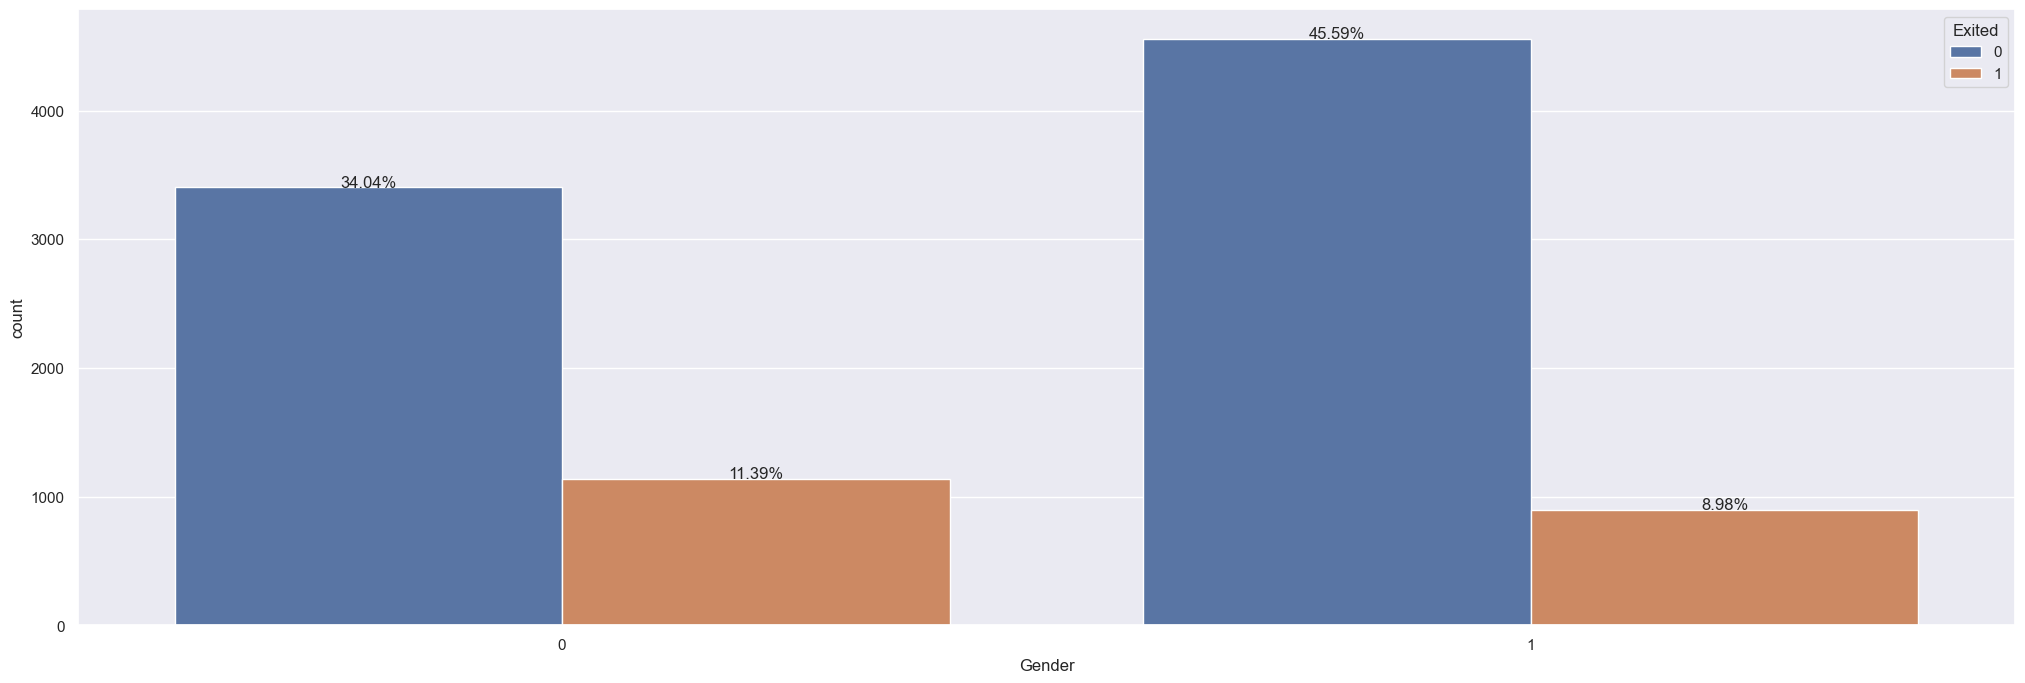

In [25]:
# Gender 
ax1 = sns.countplot(x = 'Gender', hue = 'Exited', data = df4)
show_percentage(ax1, df4)

#### 4.1.2 Geography

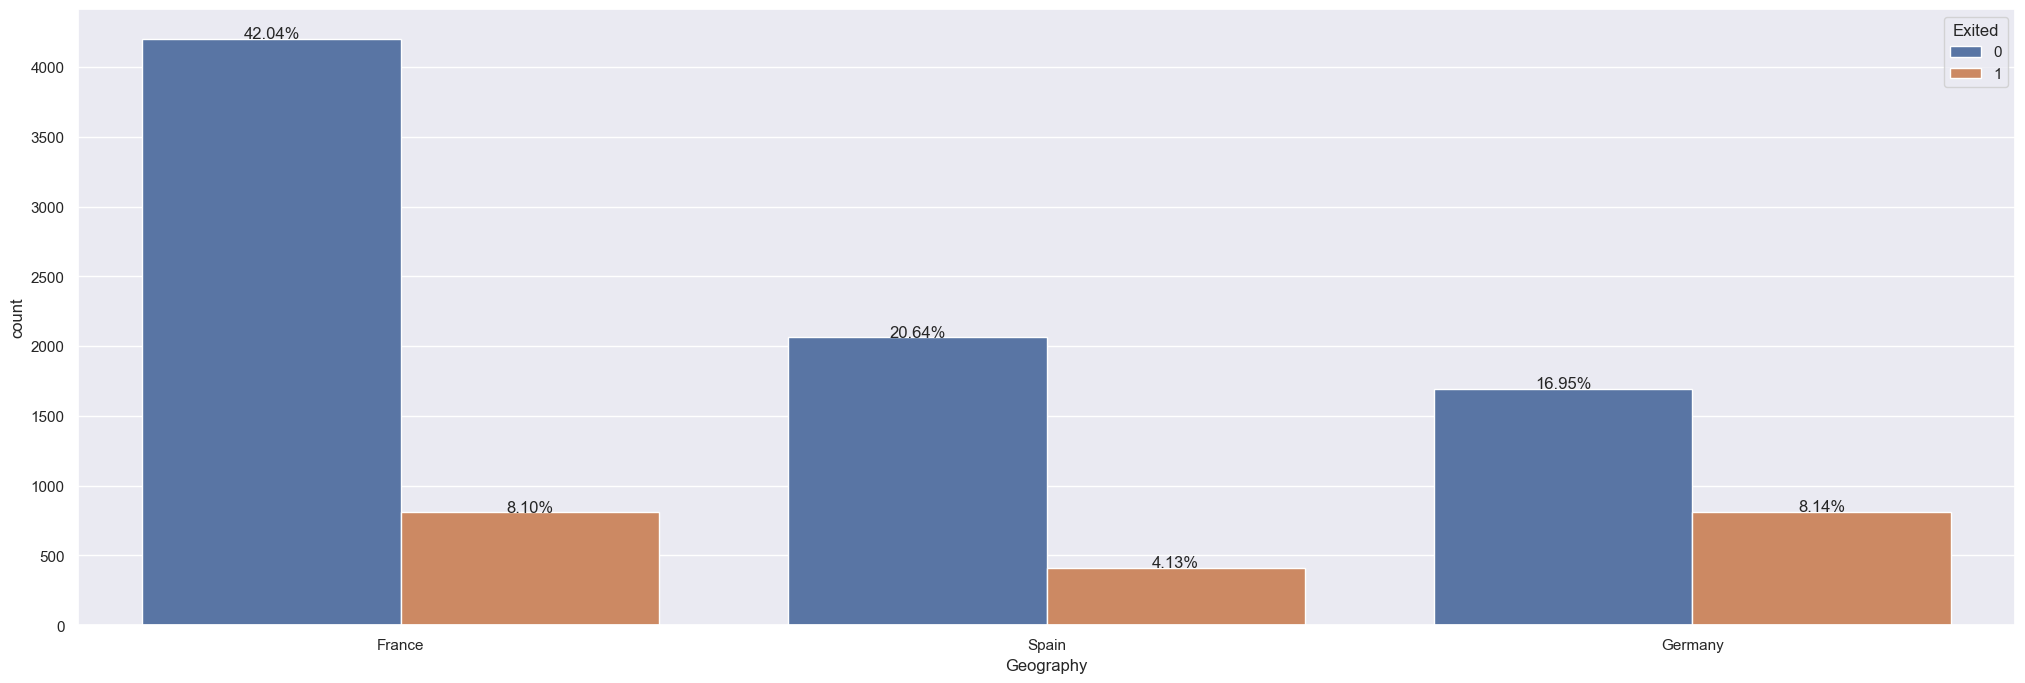

In [26]:
ax2 = sns.countplot(x = 'Geography', hue = 'Exited', data = df4)
show_percentage(ax2, df4)

#### 4.1.3 Age

Distruibuição normal entre as varaiveis Age e Exited.
Observado muitos outliers na variavel Age quando se trata de clientes que não cancelaram

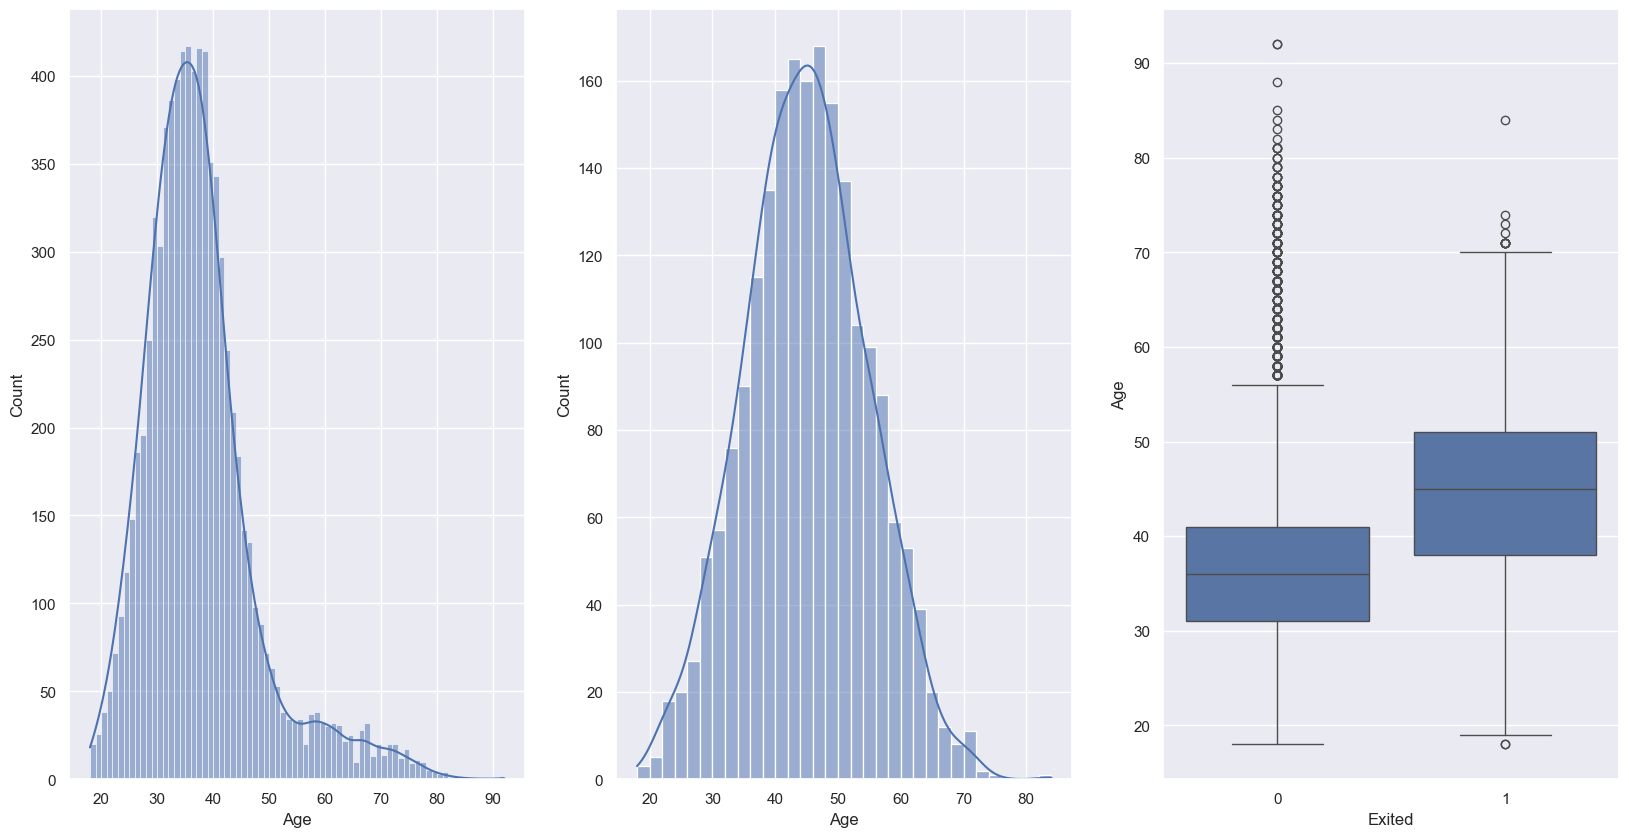

In [27]:
# Age
plt.figure(figsize = (20, 10))
aux_0 = df4.loc[df4['Exited'] == 0, 'Age']
aux_1 = df4.loc[df4['Exited'] == 1, 'Age']

plt.subplot(1, 3, 1)
sns.histplot(aux_0, kde = True)

plt.subplot(1, 3, 2)
sns.histplot(aux_1, kde = True);

plt.subplot(1, 3, 3)
sns.boxplot(x = df4['Exited'], y = df4['Age']);

#### 4.1.4 Credit Score

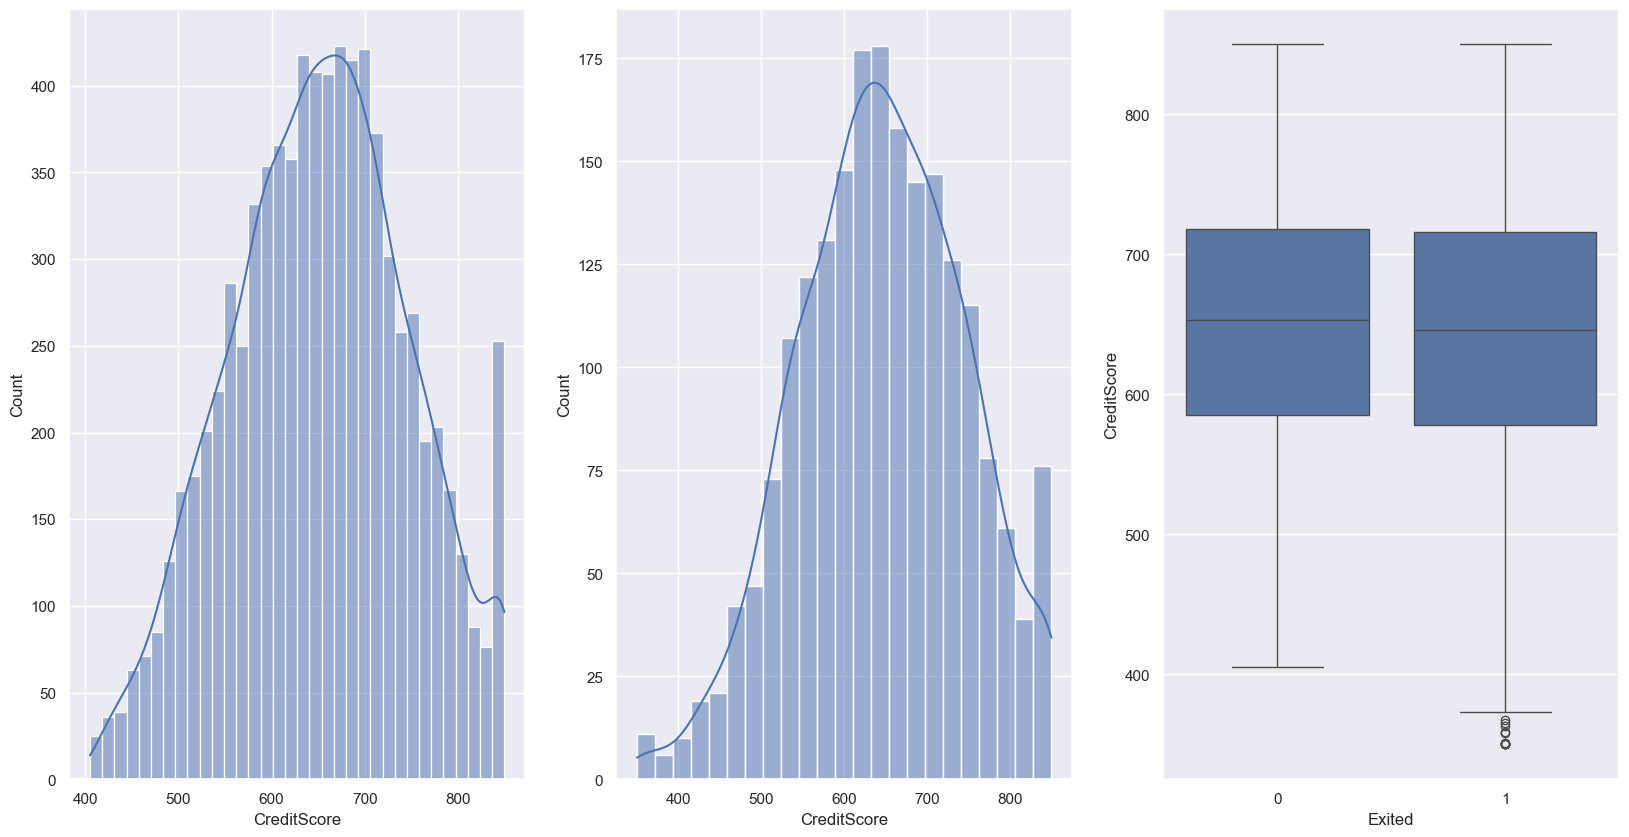

In [28]:
# Age
plt.figure(figsize = (20, 10))
aux_0 = df4.loc[df4['Exited'] == 0, 'CreditScore']
aux_1 = df4.loc[df4['Exited'] == 1, 'CreditScore']

plt.subplot(1, 3, 1)
sns.histplot(aux_0, kde = True)

plt.subplot(1, 3, 2)
sns.histplot(aux_1, kde = True);

plt.subplot(1, 3, 3)
sns.boxplot(x = df4['Exited'], y = df4['CreditScore']);

#### 4.1.5 Tenure

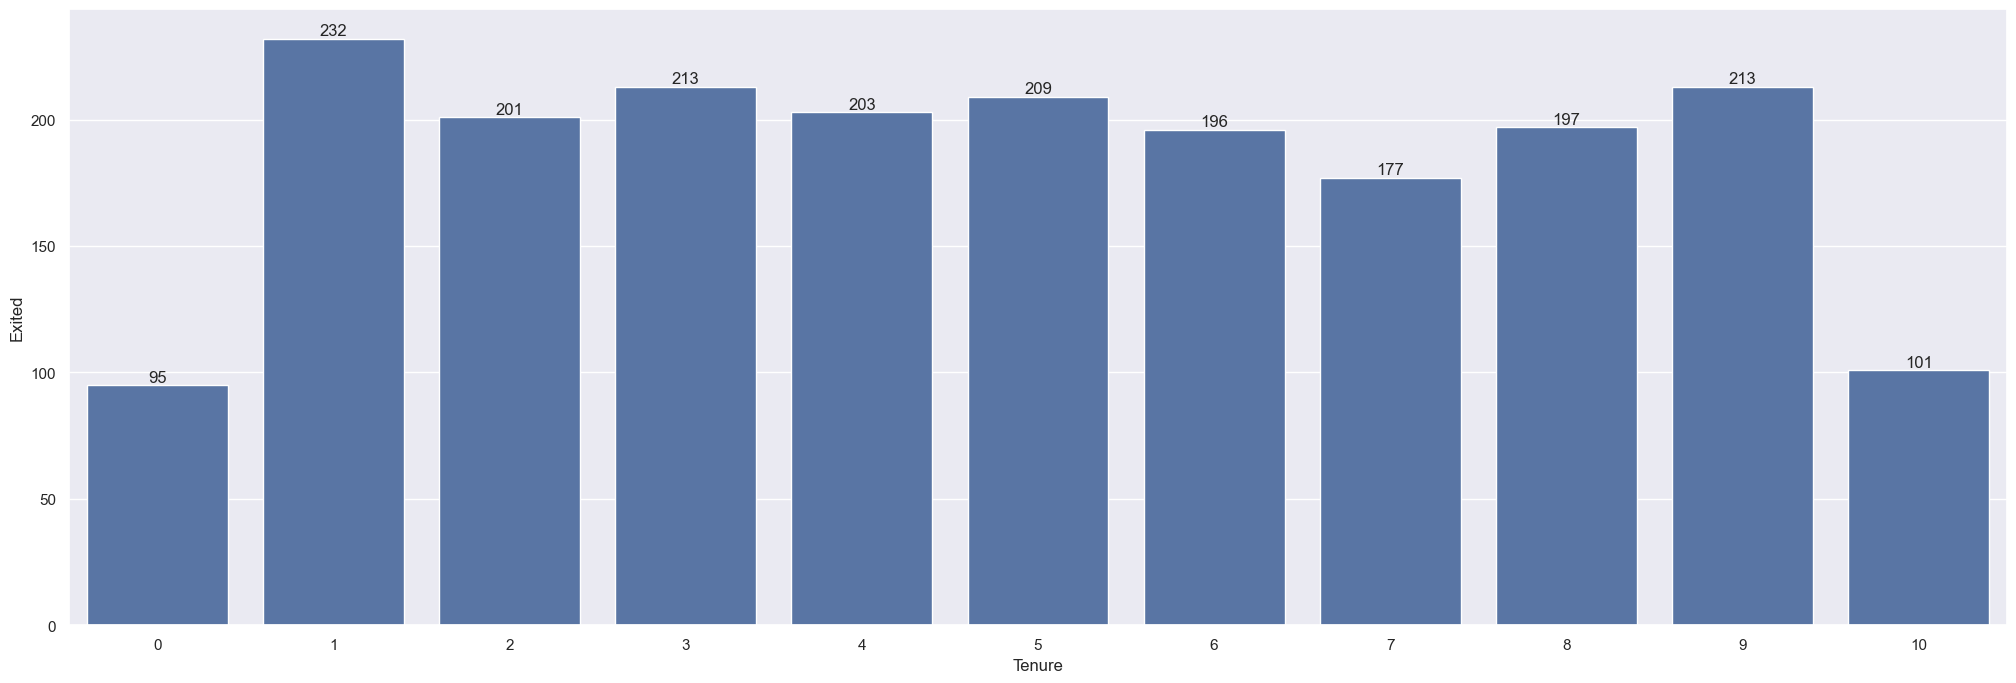

In [54]:
aux = df4[['Tenure', 'Exited']].groupby('Tenure').sum().reset_index()

ax = sns.barplot(x = 'Tenure', y = 'Exited', data = aux)
ax.bar_label(ax.containers[0]);


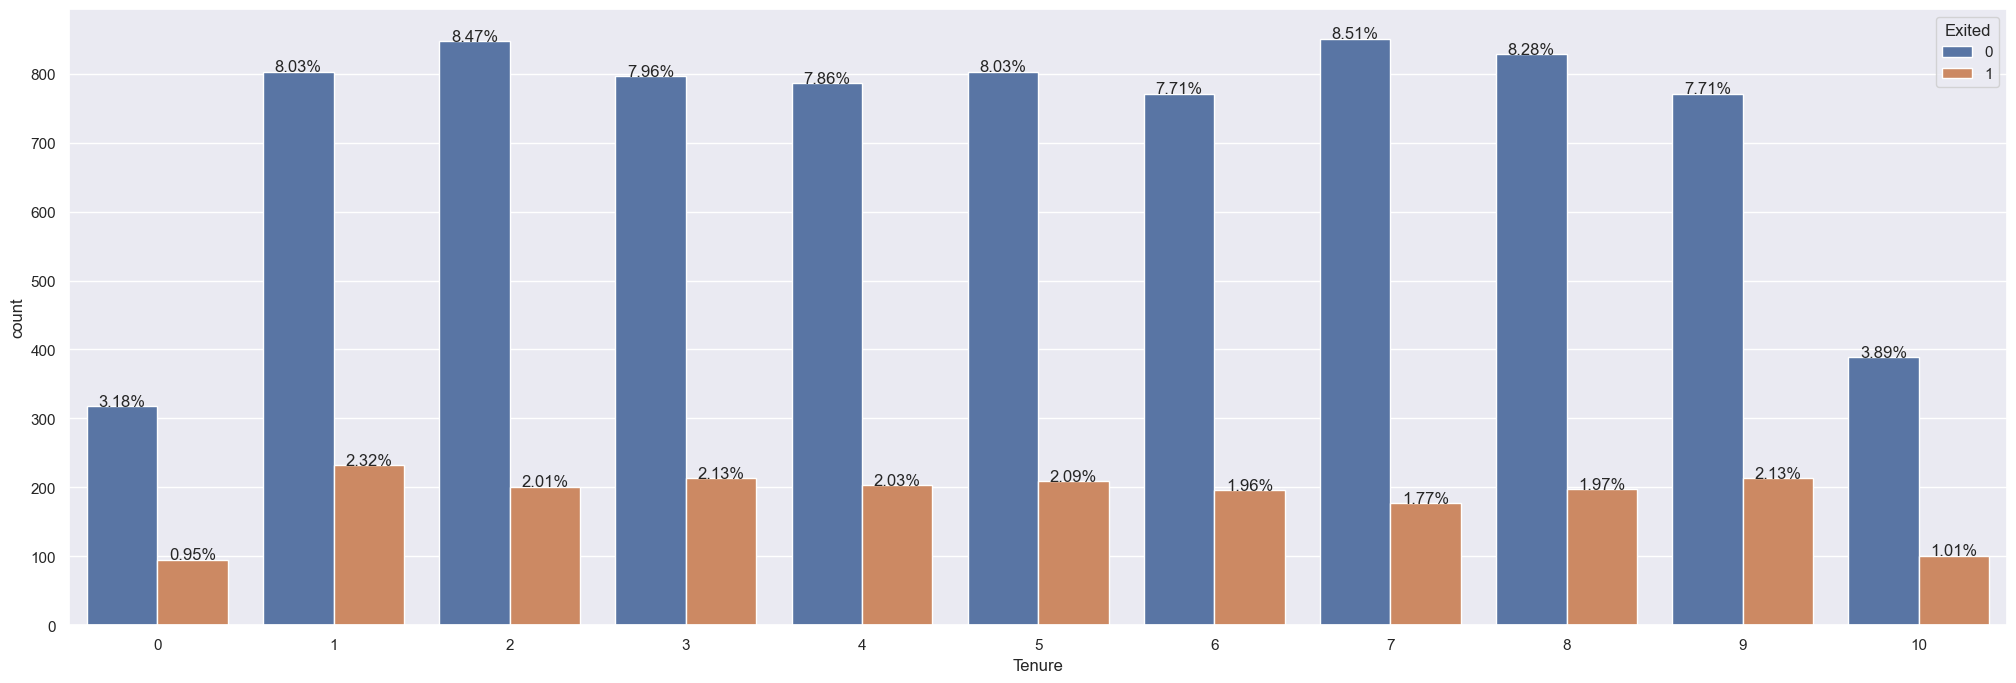

In [56]:
ax1 = sns.countplot(x='Tenure', hue='Exited', data=df4)
show_percentage(ax1, df4)

#### 4.1.6 Balance

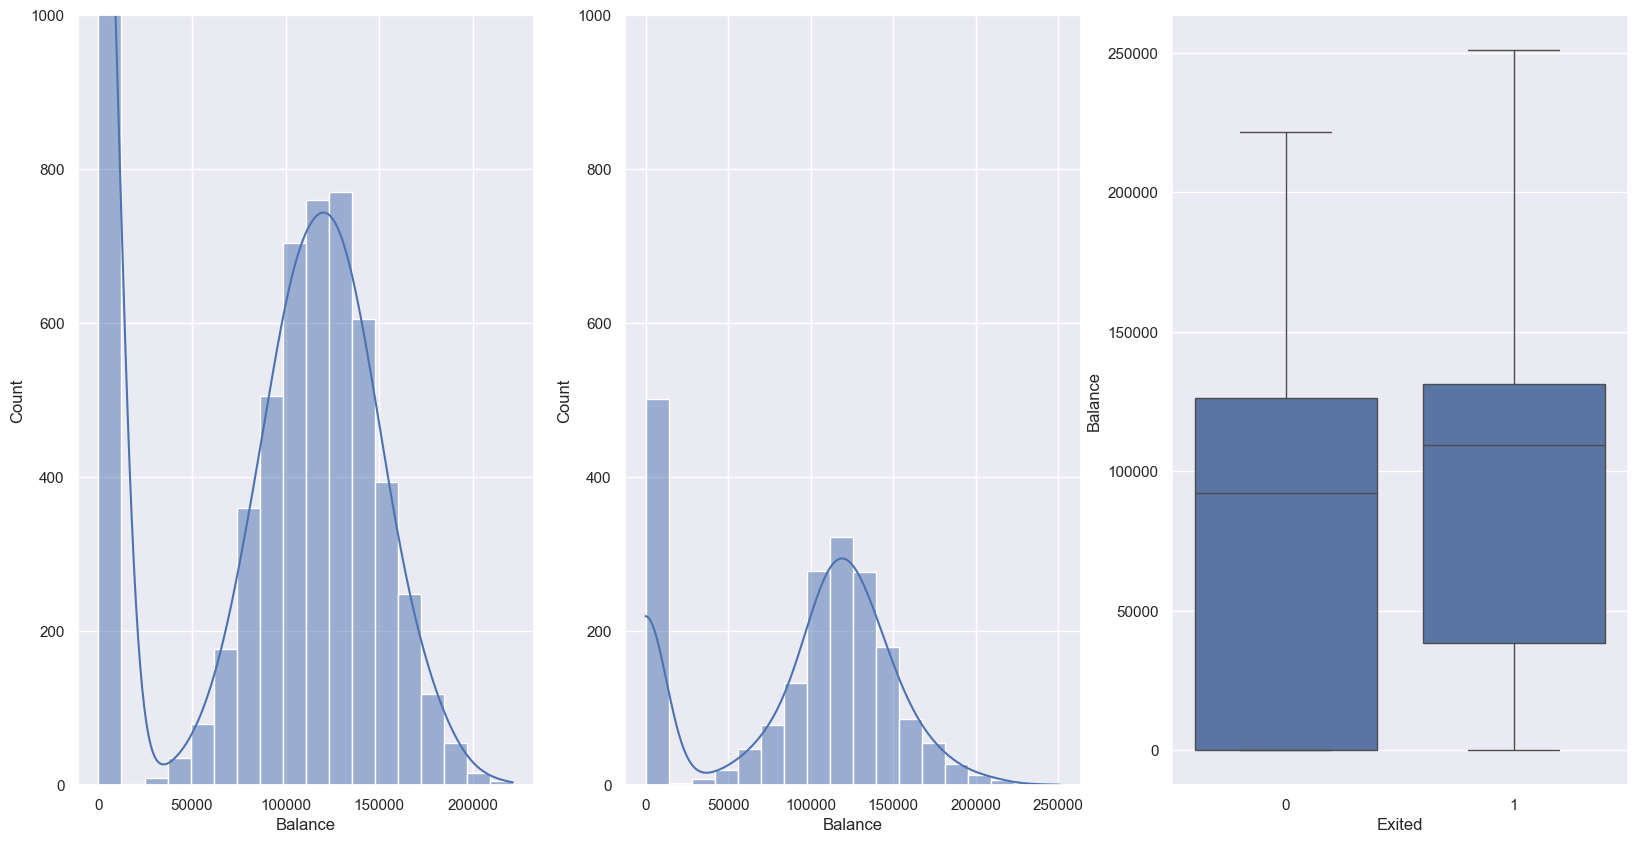

In [70]:
# Age
plt.figure(figsize = (20, 10))
aux_0 = df4.loc[df4['Exited'] == 0, 'Balance']
aux_1 = df4.loc[df4['Exited'] == 1, 'Balance']

max_y = max(aux_0.max(), aux_1.max())

plt.subplot(1, 3, 1)
sns.histplot(aux_0, kde = True)
plt.ylim(0, 1000)

plt.subplot(1, 3, 2)
sns.histplot(aux_1, kde = True)
plt.ylim(0, 1000)

plt.subplot(1, 3, 3)
sns.boxplot(x = df4['Exited'], y = df4['Balance']);

#### 4.1.7 NumOfProducts

More than 90% of the customers are between 1 or 2 NumOfProducts

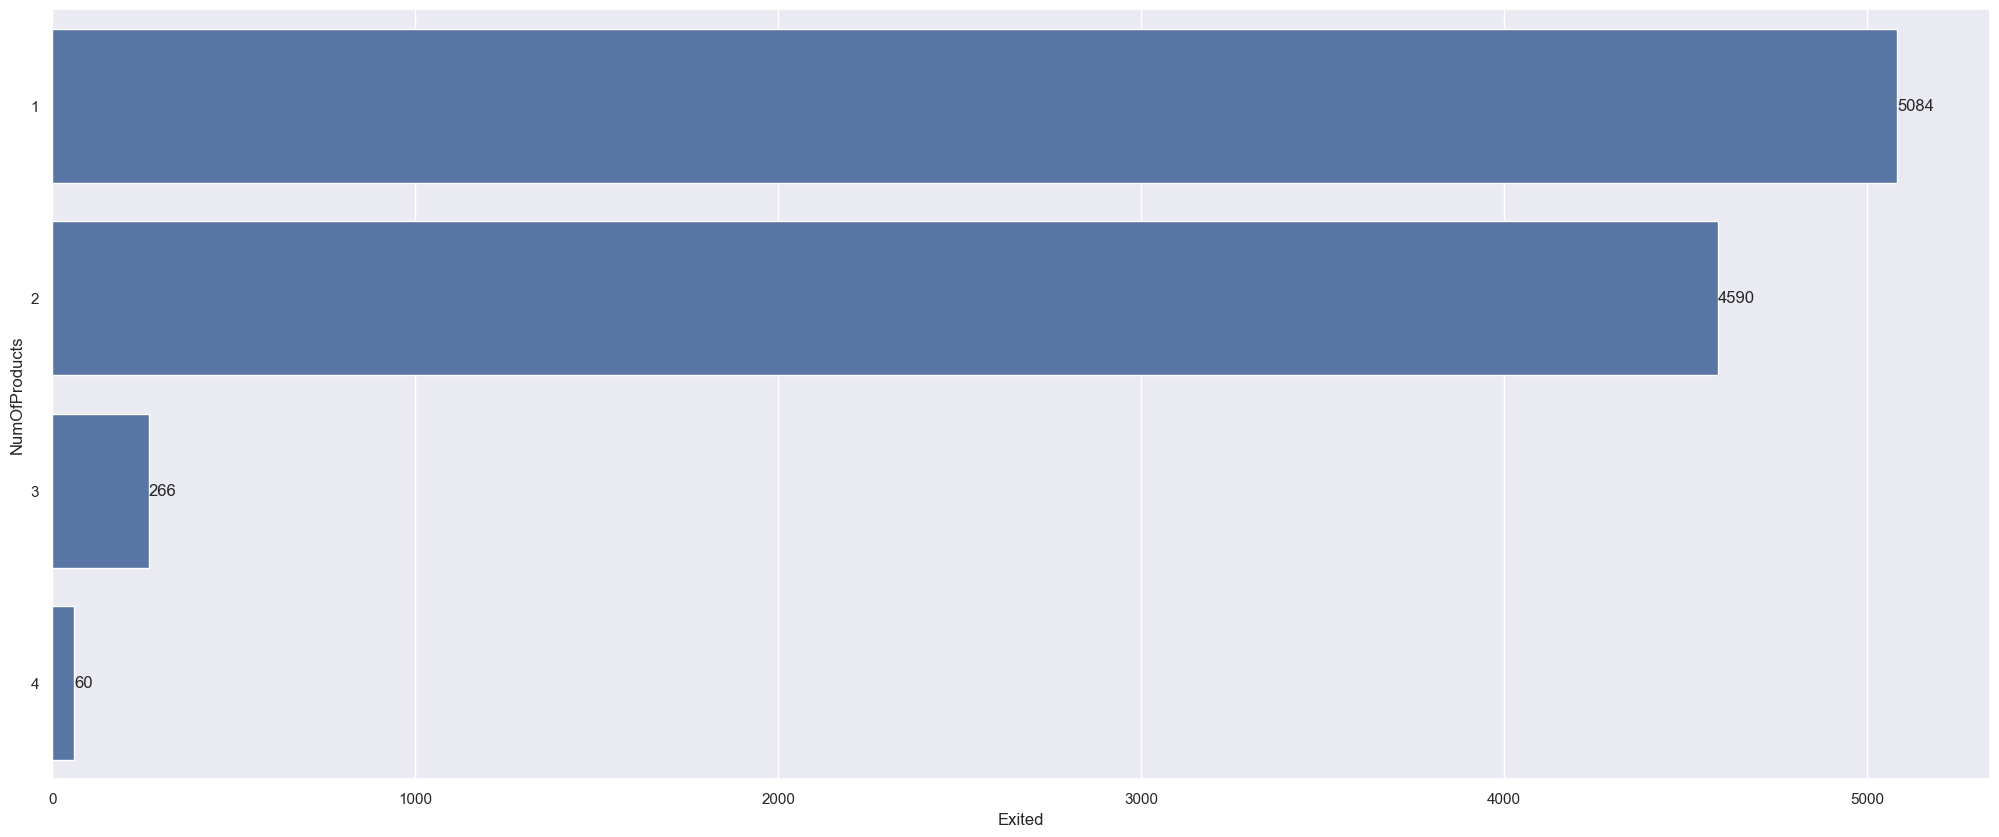

In [84]:
aux = df4[['NumOfProducts', 'Exited']].groupby('NumOfProducts').count().reset_index()


ax = sns.barplot(x='Exited', y= 'NumOfProducts', data = aux, orient = 'h')
ax.bar_label(ax.containers[0]);

#### 4.1.8 HasCrCard

Clients with no credit card exited less than others

In [90]:
dl = pd.crosstab(df4['HasCrCard'], df4['Exited']).apply(lambda x: x / x.sum(), axis = 1)
dl

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


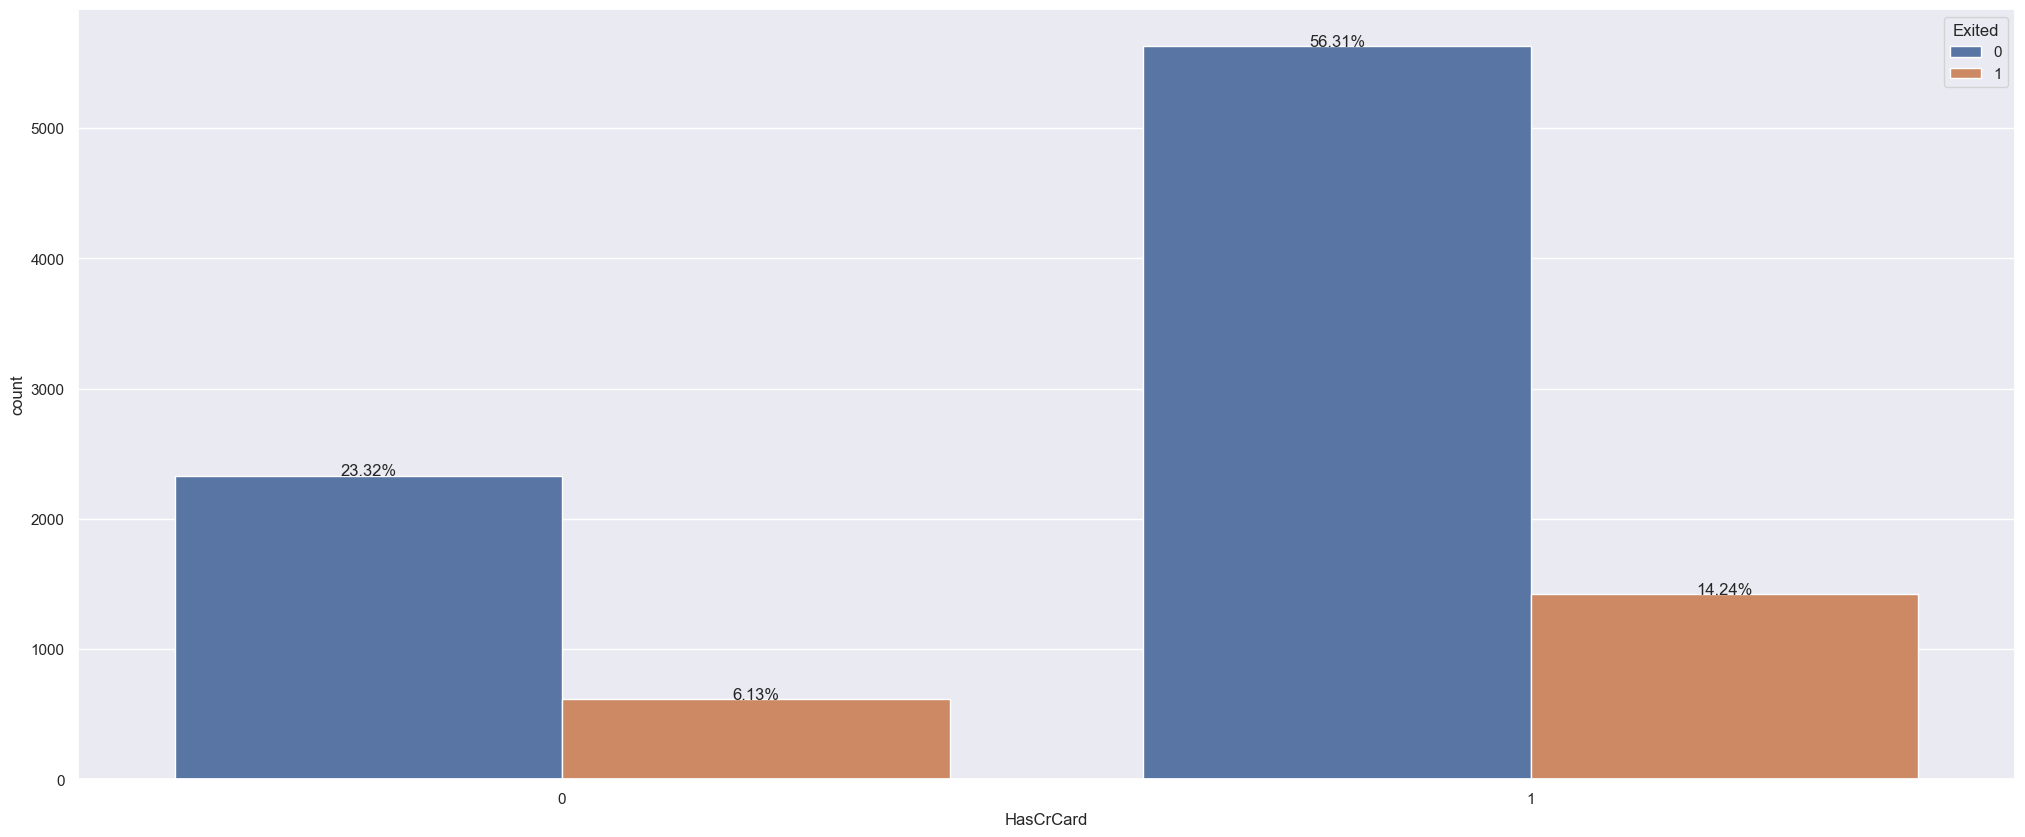

In [87]:
ax1 = sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df4)
show_percentage(ax1, df4)

#### 4.1.9 IsActiveMember

Active members exited less than others

In [97]:
dl = pd.crosstab(df4['IsActiveMember'], df4['Exited']).apply(lambda x: x / x.sum(), axis = 1)
dl


Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


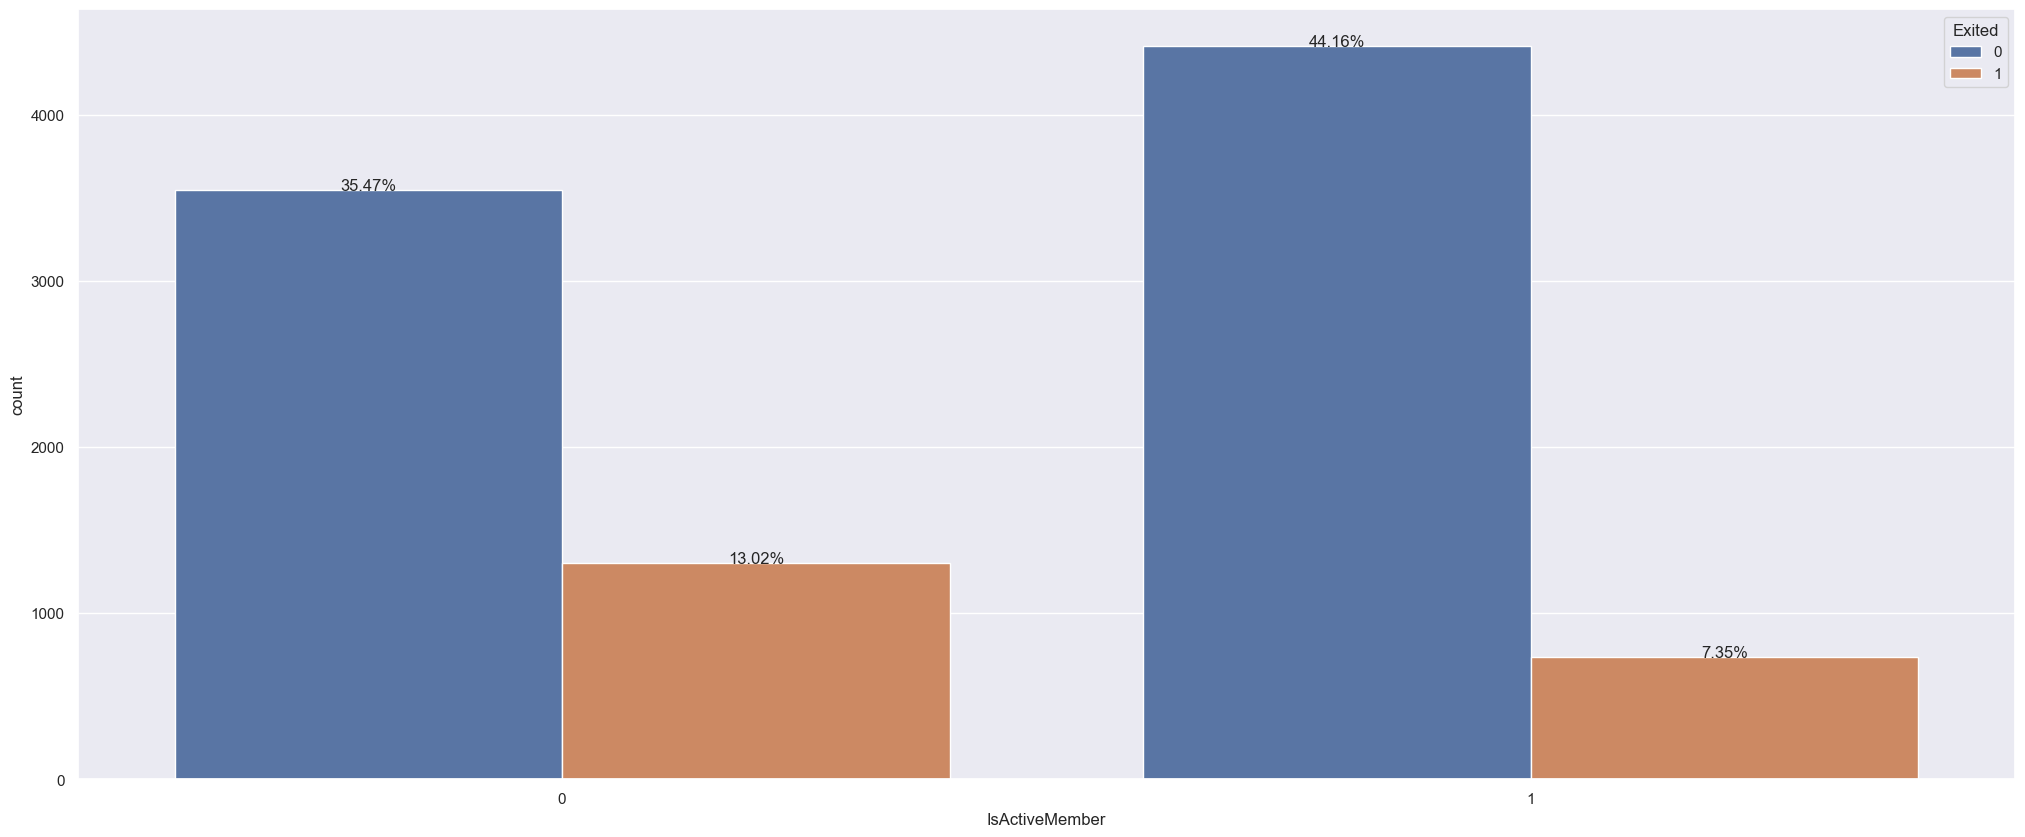

In [88]:
ax1 = sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df4)
show_percentage(ax1, df4)

#### 4.1.10 EstimatedSalary

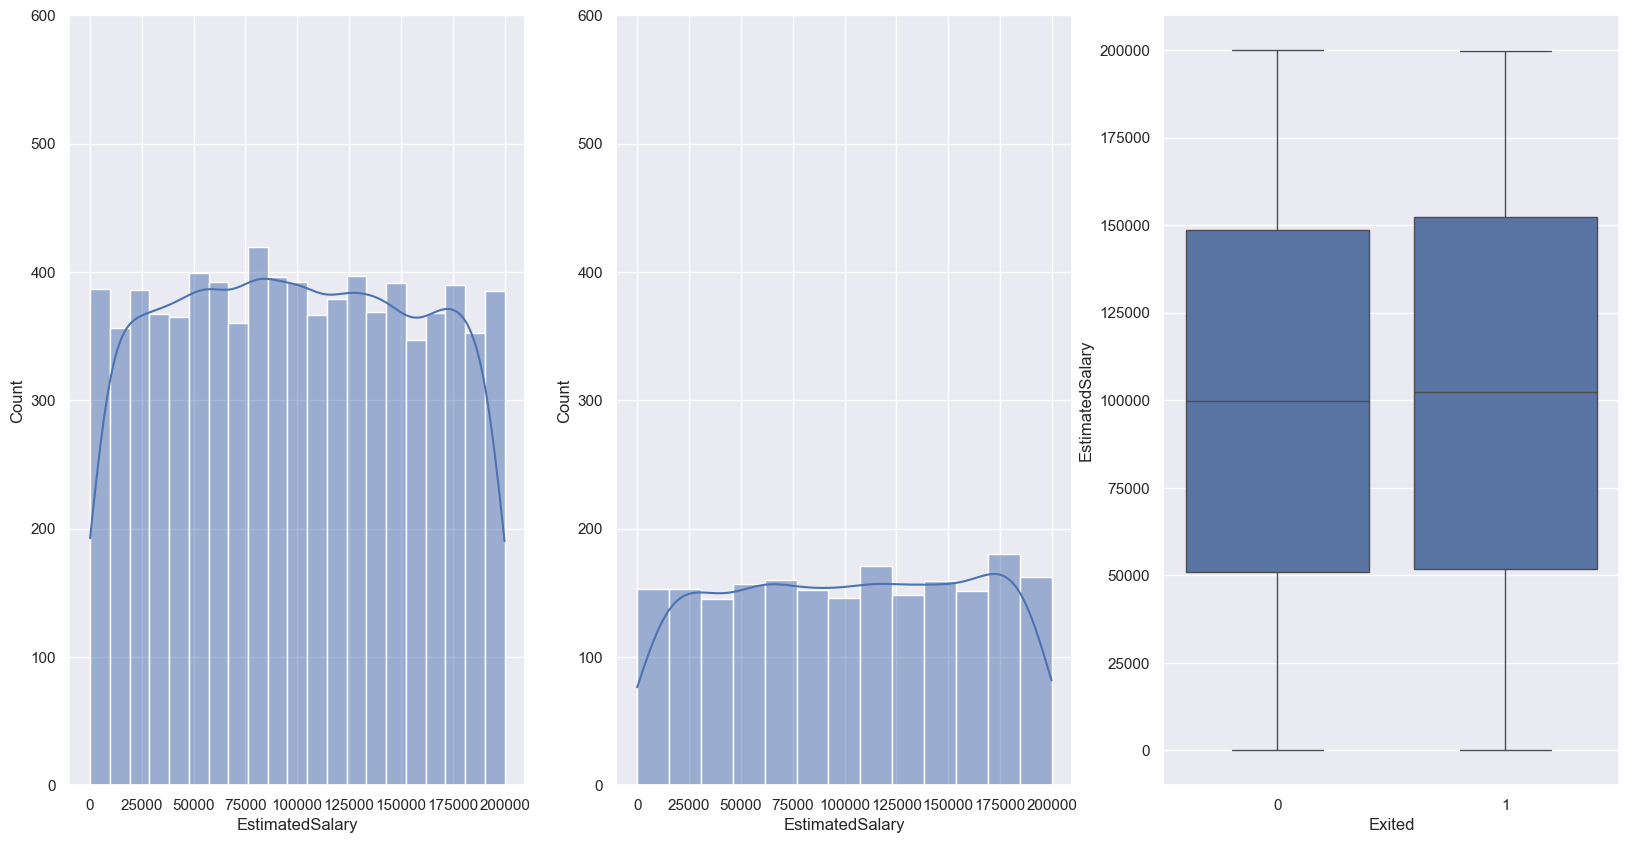

In [68]:
# Age
plt.figure(figsize = (20, 10))
aux_0 = df4.loc[df4['Exited'] == 0, 'EstimatedSalary']
aux_1 = df4.loc[df4['Exited'] == 1, 'EstimatedSalary']

max_y = max(aux_0.max(), aux_1.max())

plt.subplot(1, 3, 1)
sns.histplot(aux_0, kde = True)
plt.ylim(0, 600)

plt.subplot(1, 3, 2)
sns.histplot(aux_1, kde = True)
plt.ylim(0, 600)

plt.subplot(1, 3, 3)
sns.boxplot(x = df4['Exited'], y = df4['EstimatedSalary']);

#### 4.1.11 Credit Status

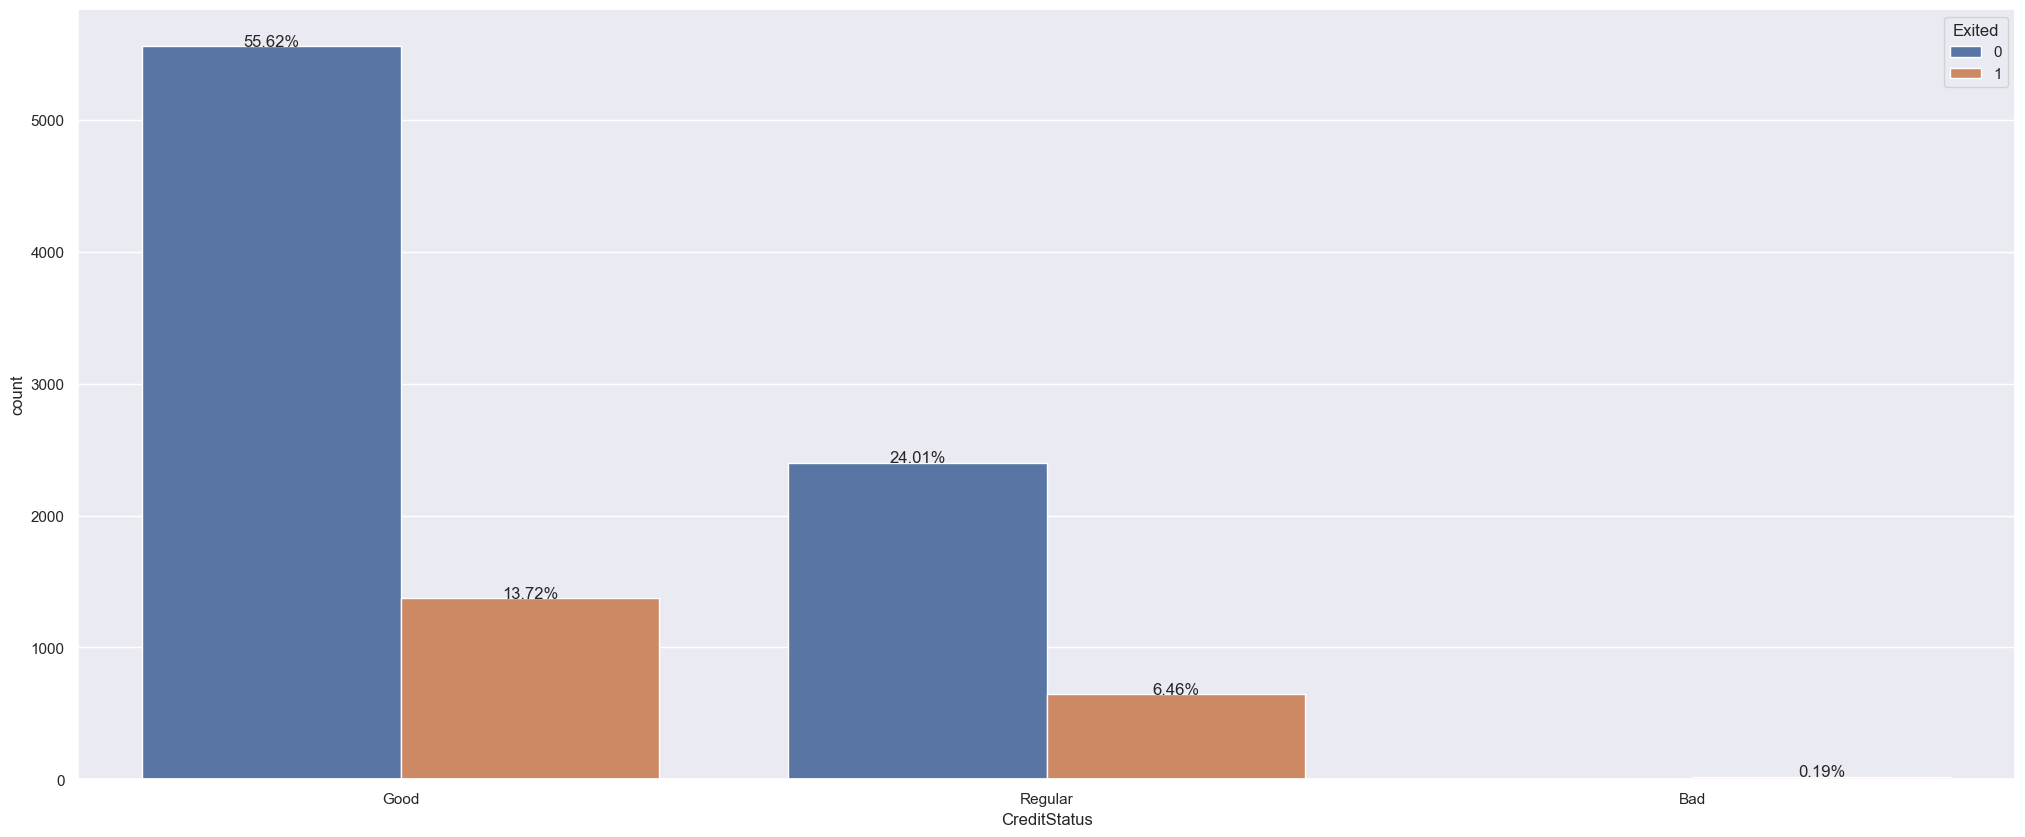

In [69]:
ax2 = sns.countplot(x = 'CreditStatus', hue = 'Exited', data = df4)
show_percentage(ax2, df4)

### 4.1.2 Análise Bivariada

### 4.1.3 Análise Multivariada

## 5.0. DATA PREPARATION

## 6.0. FEATURE SELECTION

## 7.0. MACHINE LEARNING MODELING

## 8.0. HIPERPARAMETER FINE-TUNNING

## 9.0. FINAL MODEL

## 10.0. DEPLOY

In [183]:
df4.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditStatus
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,Good
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Good
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Regular
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Good
